# Exercise

## 1. Download Haberman Cancer Survival dataset from Kaggle.

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset information from Kaggle
##### Title: Haberman's Survival Data
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

##### Attribute information:

###### 1.Age of patient at time of operation (numerical)
###### 2.Patient's year of operation (year - 1900, numerical)
###### 3.Number of positive axillary nodes detected (numerical)
###### 4.Survival status (class attribute)
       a. 1 = the patient survived 5 years or longer
       b. 2 = the patient died within 5 year

In [3]:
# Load Haberman's Survival Data from kaggle into dataframe df_cancer
df_cancer=pd.read_csv("H:\VANDITA\DatasetsAndDocsDownloaded\haberman.csv",names=['Age','Operation year','Number of axillary nodes','Survival status']
        )
print(df_cancer.head())

   Age  Operation year  Number of axillary nodes  Survival status
0   30              64                         1                1
1   30              62                         3                1
2   30              65                         0                1
3   31              59                         2                1
4   31              65                         4                1


In [4]:
print(df_cancer.shape)

(306, 4)


In [5]:
print(df_cancer.columns)

Index(['Age', 'Operation year', 'Number of axillary nodes', 'Survival status'], dtype='object')


In [6]:
print(df_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                         306 non-null int64
Operation year              306 non-null int64
Number of axillary nodes    306 non-null int64
Survival status             306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


#### Total of 306 observations and 4 features(columns) . All the columns are of int type.

In [7]:
# exploring classes 
print(df_cancer['Survival status'].value_counts())
status=df_cancer['Survival status']
status.describe()

1    225
2     81
Name: Survival status, dtype: int64


count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Survival status, dtype: float64

#### Observations:
##### 1.There are two classes .These are imbalenced in nature as class 2(didn't survive) has about 27%( approx) of total observations and majority of readings are of class 1(Survived) data.
##### 2. There are no null values to be taken care.
##### 3. Survival status is a descreate feature but its values are not informative with values 1 or 2 . So, replace them with Survived/didnt survive.
      

In [8]:
df_cancer['Survival status'].replace(to_replace=1,value='survived',inplace=True)
df_cancer['Survival status'].replace(to_replace=2,value='didnt survive',inplace=True)
df_cancer.head()
df_cancer.tail()


,Age,Operation year,Number of axillary nodes,Survival status
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,didnt survive
305,83,58,2,didnt survive


In [9]:
df_cancer['Survival status'].value_counts()

survived         225
didnt survive     81
Name: Survival status, dtype: int64

In [10]:
df_cancer.describe()

,Age,Operation year,Number of axillary nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


##### Observations:
  ###### 1. The dataset has pateints whose age vary from 30 to 83 years.
  ###### 2.  50% of the patients are in between 44 and 60 years
  ###### 3. 25% of patients dont have any axilary nodes and 75% of patiants have upto 4 nodes but maximum number of nodes is 52.(it may consist outliers)

### Objectives:

#### 1.Analyse how Age of patients and their chances of survival are related.
#### 2.check axillary nodes distribution to check for any outliers and also its relation with chances of survival.
#### 3.Analyze any relation between operation year and number of survived cases 
#### 4.Predict a new record to classify  (survived) or not(didnt survive) 

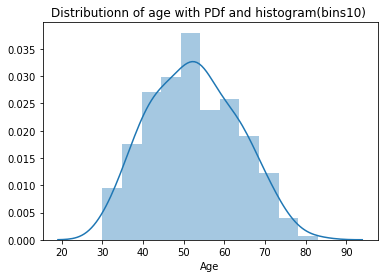

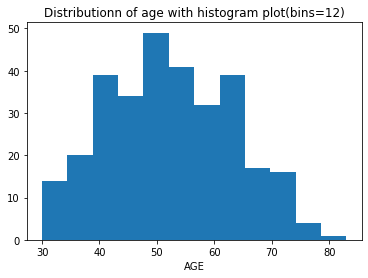

In [16]:
# A. analyzing distributionn of age
plt.close()
sns.distplot(df_cancer['Age'])
plt.title("Distributionn of age with PDf and histogram(bins10) ")
plt.show()
plt.hist(df_cancer['Age'],bins= 12)
plt.xlabel("AGE")
plt.title("Distributionn of age with histogram plot(bins=12)")
plt.show()


Text(0.5, 1.0, 'Distrubution of Number of axillary nodes using PDF and histogram')

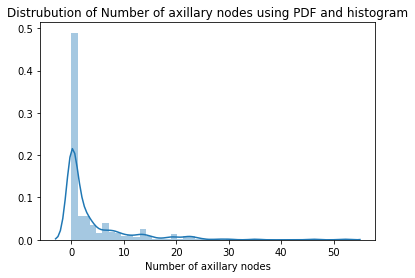

In [13]:
# B.Analyzing Axillary nodes 
sns.distplot(df_cancer['Number of axillary nodes'])
plt.title("Distrubution of Number of axillary nodes using PDF and histogram")

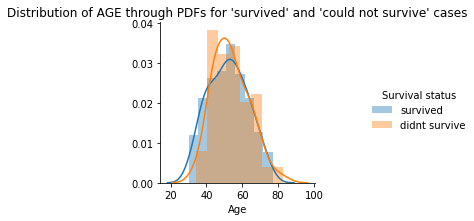

In [14]:
# Facetgrid()is Multi-plot grid for plotting conditional relationships.Facet approach partitions a plot into a matrix of panels.

# Plotting AGE,Number of nodes and Operation year per category of(Survived and could not survive)

graph=sns.FacetGrid(df_cancer,hue="Survival status", height=3)
graph.map(sns.distplot, "Age")\
      .add_legend();
plt.title("Distribution of AGE through PDFs for 'survived' and 'could not survive' cases")
plt.show()

<b>Age is normally distributed and it illustrates max number of cases(above 45) at 50 to 55 age group</b>

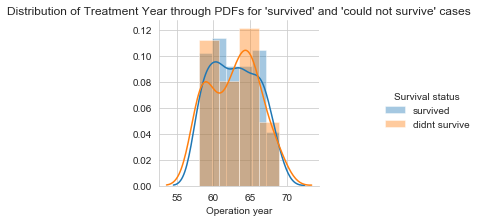

In [21]:
graph=sns.FacetGrid(df_cancer,hue="Survival status", height=3)
graph.map(sns.distplot, "Operation year")\
   .add_legend();
plt.title("Distribution of Treatment Year through PDFs for 'survived' and 'could not survive' cases")
plt.show()

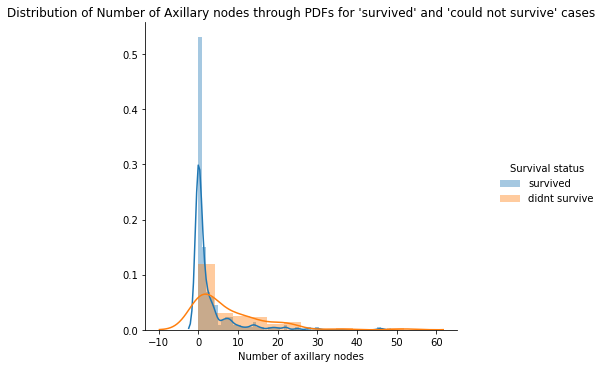

In [15]:
graph=sns.FacetGrid(df_cancer,hue="Survival status", height=5)
graph.map(sns.distplot, "Number of axillary nodes")\
   .add_legend();
plt.title("Distribution of Number of Axillary nodes through PDFs for 'survived' and 'could not survive' cases")
plt.show()

<b>Above graphs of "year of treatment" and "Age" doesnt show any dependence on Number of "survived" and "could not survive" cases as their frequency overlaps for the two classes.</b>

#### Box plot and Violin plot
<b> Box plot:</b>Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. min = Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. max=Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
<b>Violin plot</b> is the combination of box plot and probability density function.


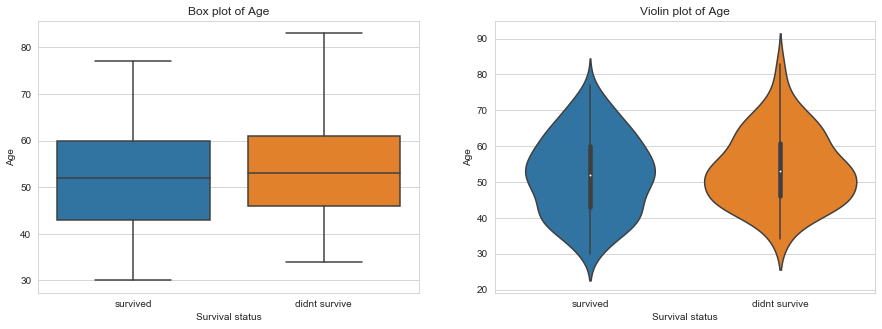

In [86]:
#AGE

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Survival status',y='Age', data=df_cancer,ax=axes[0]) 
axes[0].set_title("Box plot of Age")
sns.violinplot(x='Survival status',y='Age', data=df_cancer,ax=axes[1])
axes[1].set_title("Violin plot of Age")
plt.show()

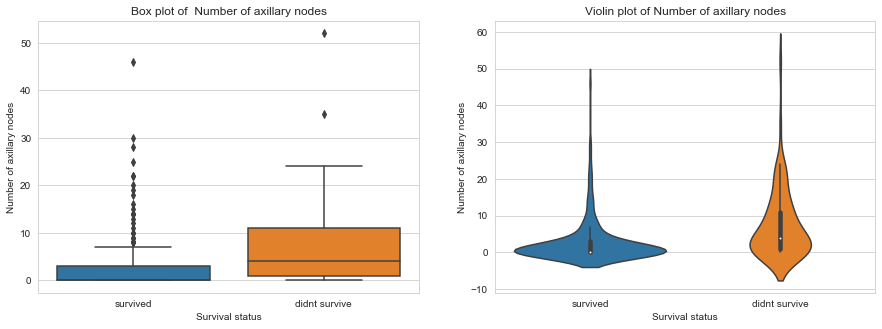

In [87]:
#Number of axillary nodes

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Survival status',y='Number of axillary nodes', data=df_cancer,ax=axes[0]) 
axes[0].set_title("Box plot of  Number of axillary nodes")
sns.violinplot(x='Survival status',y='Number of axillary nodes', data=df_cancer,ax=axes[1])
axes[1].set_title("Violin plot of Number of axillary nodes")
plt.show()

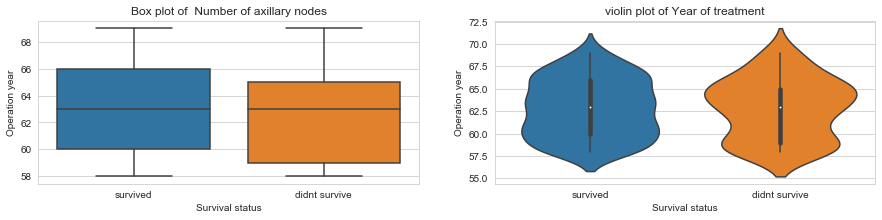

In [88]:
#Operation year
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.boxplot(x='Survival status',y='Operation year', data=df_cancer,ax=axes[0]) 
axes[0].set_title("Box plot of  Number of axillary nodes")
sns.violinplot(x='Survival status',y='Operation year', data=df_cancer,ax=axes[1])
# sns.boxplot(x='Survival status',y='Operation year', data=df_cancer,ax=axes[2]) 
axes[1].set_title("violin plot of Year of treatment")
plt.show()

#### Observations:
##### 1.some cases have abnormally high number of positive Axillary nodes(more than 30). 
##### 2. Most Number of survived cases have less than 5 axillary nodes

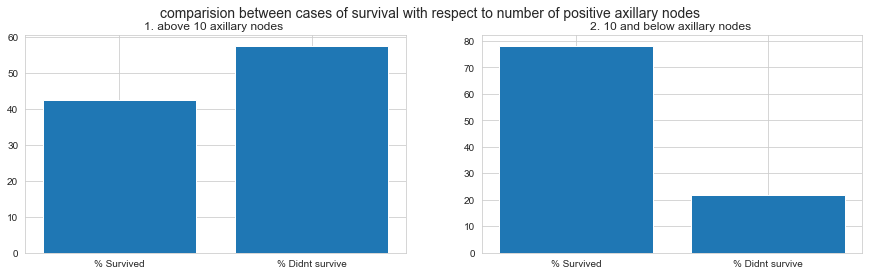

In [89]:
# A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

#analyzing survival rate with above 10 Axillary nodes in comparision to number of nodes equal to 10 and below .
survived_gt=sum((df_cancer['Survival status']=='survived') & (df_cancer['Number of axillary nodes']>10))
didnt_survive_gt=sum((df_cancer['Survival status']=='didnt survive') & (df_cancer['Number of axillary nodes']>10))

total_gt=sum(df_cancer['Number of axillary nodes']>10)

# less than or equal to 10 positive axillary nodes
survived_le=sum((df_cancer['Survival status']=='survived') & (df_cancer['Number of axillary nodes']<=10))
didnt_survive_le=sum((df_cancer['Survival status']=='didnt survive') & (df_cancer['Number of axillary nodes']<=10))

total_le=sum(df_cancer['Number of axillary nodes']<=10)

# Calculating Survival rate in both cases ("nodes more than 10" and "nodes equal to or less than 10")
survived_gt_perc=survived_gt/total_gt*100
didnt_survive_gt_perc=didnt_survive_gt/total_gt*100

survived_le_perc=survived_le/total_le*100
didnt_survive_le_perc=didnt_survive_le/total_le*100

# Plotting
fig, (ax,axn)= plt.subplots(1,2,figsize=(15,4))
ax.bar(['% Survived','% Didnt survive'],[survived_gt_perc,didnt_survive_gt_perc])
ax.set_title("1. above 10 axillary nodes ")
axn.bar(['% Survived','% Didnt survive'],[survived_le_perc,didnt_survive_le_perc])
axn.set_title("2. 10 and below axillary nodes ")
fig.suptitle('comparision between cases of survival with respect to number of positive axillary nodes', fontsize=14)
plt.show()

#### Observations:
##### 1.In the cases having more than 10 axillary nodes, survival rate(43%approx) is comparitively lower than that of cases having 20 and below axillary node(77% approx)

#### Distributed plots
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.


PDF of Age: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
PDF of no. of nodes: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
PDF of Operation year: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]


Text(0.5, 1.0, 'PDF and CDF of year')

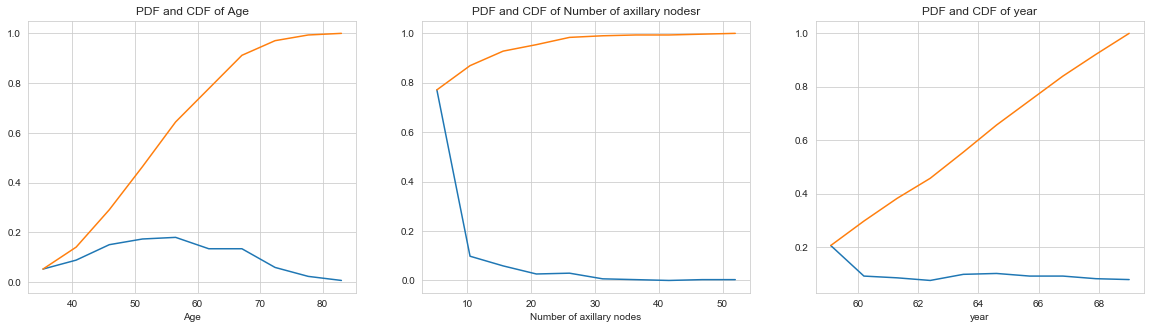

In [90]:
# * Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
# * The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

#PDf and CDF of Number of axillary nodes
plt.close()
plt.figure(figsize=(20,5))
counts, bin_edges = np.histogram(df_cancer['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('PDF of Age:',pdf)
cdf = np.cumsum(pdf)
plt.subplot(1, 3, 1)
plt.xlabel("Age")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of Age")

counts, bin_edges = np.histogram(df_cancer['Number of axillary nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('PDF of no. of nodes:',pdf)
cdf = np.cumsum(pdf)
plt.subplot(1, 3, 2)
plt.xlabel("Number of axillary nodes")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of Number of axillary nodesr")

counts, bin_edges = np.histogram(df_cancer['Operation year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('PDF of Operation year:',pdf)
cdf = np.cumsum(pdf)
plt.subplot(1, 3, 3)
plt.xlabel("year")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF of year")

#### Observations:
##### 1. Nearly 85%(approx) of cases have patients having less than 10 nodes.
##### 2. More than 95% of cases have patients less than 70 age i.e only 5%(approx) cases have pateints above 70 years.
##### 3. Number of cases were approximately constant across all the years.
#### None of the above information gives us any clue towards what feature could depend on survival status directly.

## Multivariate Analysis

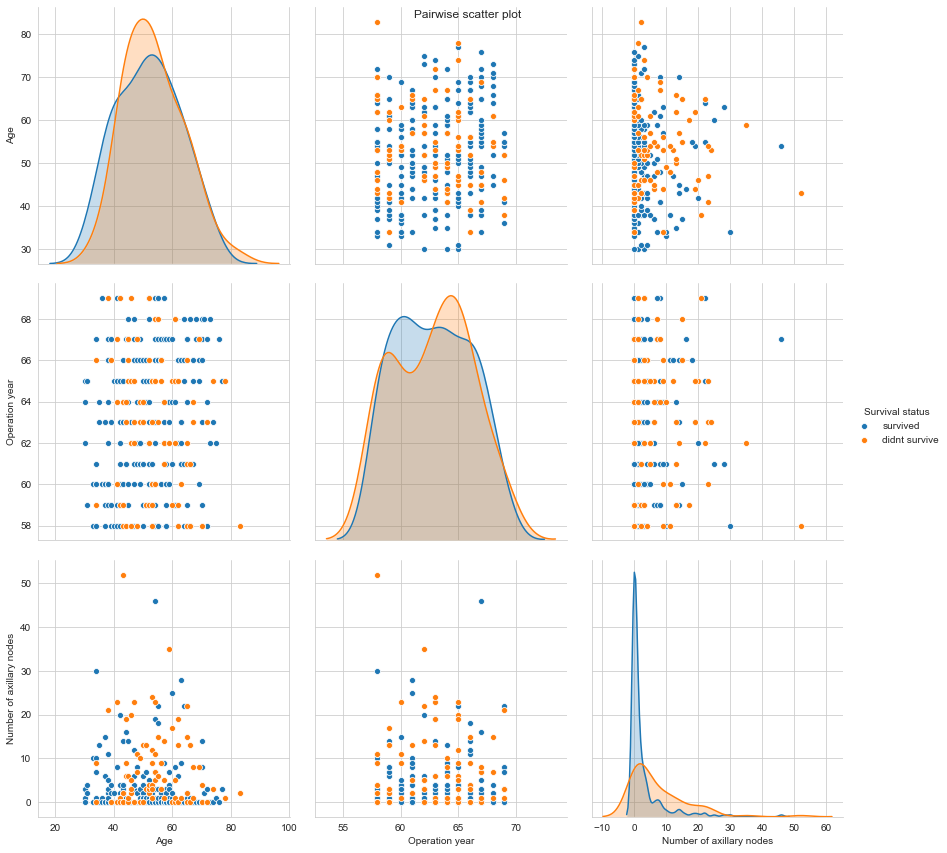

In [20]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

sns.set_style("whitegrid")
g=sns.pairplot(df_cancer,hue='Survival status',height=4)
g.fig.suptitle("Pairwise scatter plot")
plt.show()

Can't find any relation or dependence of two features over the Survival status from above scatterplots,Since all the dots seem to randomly placed all over the graph area with no proper seperation of survived and couldnt survive cases.